In [1]:
#ik importeer hier mijn python modules
import geopandas as gpd
import pandas as pd
import numpy as np
#hier stel ik in dat hij de hele colom print
pd.options.display.max_columns = None
pd.options.display.max_rows = None


In [24]:
#input voor de query onder aan de notebook
postcodeinput = 7701
gemeenteinput = 'Hardenberg'

In [3]:
#inladen dataset postcode 2017
data = gpd.read_file('data/woz2017.gpkg')

In [4]:
#overzicht van data en collomen dataset postcode
data.head()

,postcode,aantal_inwoners,aantal_mannen,aantal_vrouwen,aantal_inwoners_0_tot_15_jaar,aantal_inwoners_15_tot_25_jaar,aantal_inwoners_25_tot_45_jaar,aantal_inwoners_45_tot_65_jaar,aantal_inwoners_65_jaar_en_ouder,aantal_part_huishoudens,gemiddelde_huishoudensgrootte,aantal_eenpersoonshuishoudens,aantal_meerpersoonshuishoudens_zonder_kind,aantal_eenouderhuishoudens,aantal_tweeouderhuishoudens,aantal_geboorten,percentage_nederlandse_achtergrond,percentage_westerse_migr_achtergr,percentage_niet_westerse_migr_achtergr,aantal_woningen,aantal_woningen_bouwjaar_voor_1945,aantal_woningen_bouwjaar_45_tot_65,aantal_woningen_bouwjaar_65_tot_75,aantal_woningen_bouwjaar_75_tot_85,aantal_woningen_bouwjaar_85_tot_95,aantal_woningen_bouwjaar_95_tot_05,aantal_woningen_bouwjaar_05_tot_15,aantal_woningen_bouwjaar_15_en_later,gemiddelde_woz_waarde_woning,percentage_koopwoningen,percentage_huurwoningen,aantal_huurwoningen_in_bezit_woningcorporaties,aantal_meergezins_woningen,aantal_niet_bewoonde_woningen,gemiddeld_gasverbruik_woning,gemiddeld_elektricteitsverbruik_woning,aantal_personen_met_uitkering_onder_AOWlft,oprit_hoofdverkeersweg_gemiddelde_afstand_in_km,kinderdagverblijf_gemiddelde_afstand_in_km,kinderdagverblijf_aantal_binnen_1_km,kinderdagverblijf_aantal_binnen_3_km,kinderdagverblijf_aantal_binnen_5_km,buitenschoolse_opvang_gem_afstand_in_km,buitenschoolse_opvang_aantal_binnen_1_km,buitenschoolse_opvang_aantal_binnen_3_km,buitenschoolse_opvang_aantal_binnen_5_km,grote_supermarkt_gemiddelde_afstand_in_km,grote_supermarkt_aantal_binnen_1_km,grote_supermarkt_aantal_binnen_3_km,grote_supermarkt_aantal_binnen_5_km,winkels_ov_dagelijkse_levensm_gem_afst_in_km,winkels_ov_dagel_levensm_aantal_binnen_1_km,winkels_ov_dagel_levensm_aantal_binnen_3_km,winkels_ov_dagel_levensm_aantal_binnen_5_km,warenhuis_gemiddelde_afstand_in_km,warenhuis_aantal_binnen_5_km,warenhuis_aantal_binnen_10_km,warenhuis_aantal_binnen_20_km,cafe_gemiddelde_afstand_in_km,cafe_aantal_binnen_1_km,cafe_aantal_binnen_3_km,cafe_aantal_binnen_5_km,cafetaria_gemiddelde_afstand_in_km,cafetaria_aantal_binnen_1_km,cafetaria_aantal_binnen_3_km,cafetaria_aantal_binnen_5_km,restaurant_gemiddelde_afstand_in_km,restaurant_aantal_binnen_1_km,restaurant_aantal_binnen_3_km,restaurant_aantal_binnen_5_km,hotel_gemiddelde_afstand_in_km,hotel_aantal_binnen_5_km,hotel_aantal_binnen_10_km,hotel_aantal_binnen_20_km,treinstation_gemiddelde_afstand_in_km,overstapstation_gemiddelde_afstand_in_km,brandweerkazerne_gemiddelde_afstand_in_km,omgevingsadressendichtheid,stedelijkheid,ms_fid,geometry
0,1011,9645,4990,4655,800,1195,3195,2920,1540,6380,1.5,4175,1305,345,500,80,60,30,10,6110,3605,115,115,800,390,670,370,45,386,30,70,2390,5915,715,860,2030,825,4.6,0.3,6.7,83.5,227.9,0.4,4.0,48.5,146.1,0.3,6.7,73.4,138.8,0.3,61.0,565.4,967.2,0.5,10.8,20.6,36.1,0.1,116.8,555.0,732.7,0.2,109.0,609.4,861.0,0.1,178.8,1219.4,1738.4,0.2,349.1,400.0,464.4,1.2,1.2,0.7,6907,1,1,"MULTIPOLYGON (((122246.232 487910.177, 122259...."
1,1012,8240,4480,3760,465,1195,4195,1730,650,5960,1.4,4245,1175,190,260,70,50,30,10,5695,4725,20,50,85,490,225,105,-99997,343,20,80,720,5380,1185,1020,2060,480,4.0,0.4,4.2,101.2,239.6,0.6,2.4,57.4,146.1,0.3,7.5,69.7,142.9,0.1,131.8,567.5,986.0,0.5,10.9,20.6,38.8,0.1,183.7,574.7,737.9,0.1,199.9,624.5,874.3,0.0,313.0,1267.9,1759.3,0.1,354.5,400.2,469.9,0.8,0.8,1.3,8410,1,2,"MULTIPOLYGON (((121995.029 488243.202, 121999...."
2,1013,21080,10550,10525,2640,1860,7685,6115,2775,12580,1.7,7525,2430,1020,1510,265,60,20,20,12825,6930,75,115,1625,1475,445,2005,160,329,30,70,6340,12670,1540,880,1950,2720,2.9,0.3,6.9,54.7,166.6,0.3,5.6,34.7,107.7,0.4,4.5,34.5,108.7,0.2,42.1,348.1,809.5,0.8,9.5,20.9,39.0,0.3,26.8,363.9,677.7,0.2,34.1,392.6,772.2,0.2,65.6,729.6,1529.2,0.6,338.0,398.9,467.7,1.7,1.7,2.0,6224,1,3,"MULTIPOLYGON (((120506.219 489494.551, 120495...."
3,1014,645,375,270,65,45,400,115,20,330,1.7,170,105,10,45,10,60,20,20,270,20,5,5,5,20,185,-99997,25,395,10,80,10,225,30,490,2180,80,0.7,0.6,4.1,47.6,135.7,0.5

In [5]:
#filter de data die ik nodig ben eruit
data = data[['postcode','gemiddelde_woz_waarde_woning','geometry']]

In [6]:
# toon de nieuwe dataframe
data.head()



,postcode,gemiddelde_woz_waarde_woning,geometry
0,1011,386,"MULTIPOLYGON (((122246.232 487910.177, 122259...."
1,1012,343,"MULTIPOLYGON (((121995.029 488243.202, 121999...."
2,1013,329,"MULTIPOLYGON (((120506.219 489494.551, 120495...."
3,1014,395,"MULTIPOLYGON (((120390.113 489860.746, 120387...."
4,1015,400,"MULTIPOLYGON (((120665.642 488535.500, 120668...."


In [7]:
#haal postcodes eruit waar geen woz waarde van is
data2 = data
data2 = data2[data2.gemiddelde_woz_waarde_woning != -99997]
# data2['gemiddelde_woz_waarde_woning'] = data2['gemiddelde_woz_waarde_woning'].replace({'-99997': np.nan})
# data4 = data.replace('-99997', np.nan)
# data3 = data[data.gemiddelde_woz_waarde_woning == '-99997']['y'] = np.nan
# data2 = data.loc[data['gemiddelde_woz_waarde_woning'] == '-99997','gemiddelde_woz_waarde_woning'] = np.nan

In [8]:
data2.head()

,postcode,gemiddelde_woz_waarde_woning,geometry
0,1011,386,"MULTIPOLYGON (((122246.232 487910.177, 122259...."
1,1012,343,"MULTIPOLYGON (((121995.029 488243.202, 121999...."
2,1013,329,"MULTIPOLYGON (((120506.219 489494.551, 120495...."
3,1014,395,"MULTIPOLYGON (((120390.113 489860.746, 120387...."
4,1015,400,"MULTIPOLYGON (((120665.642 488535.500, 120668...."


In [9]:
#inladen van linkdata om van een postcode een gemeente te maken
postcode = gpd.read_file('data/link/postcodetabel.csv')

In [10]:
postcode.head()

,postcode,gemeente,geometry
0,6651,Druten,None
1,1189,Amstelveen,None
2,1065,Amsterdam,None
3,8471,Weststellingwerf,None
4,7231,Zutphen,None


In [13]:
postcode = postcode[['postcode','gemeente']]
# data4 = pd.merge(data2, postcode,left_on='postcode',right_on='PostcodeNummers')


In [14]:
#join/merge dataset 
data2.postcode = data2.postcode.astype(int)
postcode.postcode = postcode.postcode.astype(int)
ok = data2.merge(postcode, on='postcode')

/home/jacco/.local/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [15]:
#verwijder dubbele records en schrijf resultaat naar csv
ok = ok.drop_duplicates()
ok.to_csv('data/link/dataset.csv')

In [31]:
# ok


In [29]:
gemdata = ok.loc[ok['gemeente'] == gemeenteinput]

In [31]:
gemdata['gemiddelde_woz_waarde_gemeente'] = gemdata.gemiddelde_woz_waarde_woning.mean()

/home/jacco/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
gemdata

,postcode,gemiddelde_woz_waarde_woning,geometry,gemeente,gemiddelde_woz_waarde_gemeente
384954,7691,196,"MULTIPOLYGON (((236848.560 506441.649, 236840....",Hardenberg,245.030303
385036,7692,210,"MULTIPOLYGON (((235909.927 503841.630, 235907....",Hardenberg,245.030303
385062,7693,211,"MULTIPOLYGON (((240234.755 502571.904, 240351....",Hardenberg,245.030303
385102,7694,207,"MULTIPOLYGON (((243841.168 505801.068, 243910....",Hardenberg,245.030303
385144,7695,237,"MULTIPOLYGON (((239813.558 507289.721, 239816....",Hardenberg,245.030303
385176,7696,273,"MULTIPOLYGON (((238612.515 508626.208, 238624....",Hardenberg,245.030303
385187,7701,202,"MULTIPOLYGON (((228321.800 515825.469, 228323....",Hardenberg,245.030303
385531,7702,211,"MULTIPOLYGON (((227020.385 511651.232, 227010....",Hardenberg,245.030303
385563,7707,228,"MULTIPOLYGON (((218779.070 519311.735, 218793....",Hardenberg,245.030303
387852,7771,179,"MULTIPOLYGON (((239566.878 511210.256, 239563....",Hardenberg,245.030303


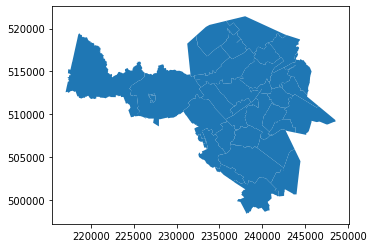

In [33]:
gemdata.plot()

In [34]:
gemdata2 = ok.loc[ok['postcode'] == postcodeinput]

In [35]:
gemdata2

,postcode,gemiddelde_woz_waarde_woning,geometry,gemeente
385187,7701,202,"MULTIPOLYGON (((228321.800 515825.469, 228323....",Hardenberg


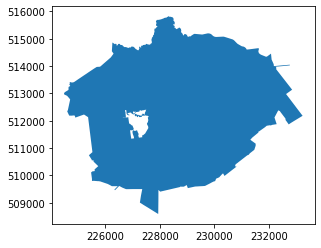

In [36]:
gemdata2.plot()